# Study - Station Keeping
This code intends to study the station keeping capabilities of a 3U Cubesat through orbital mechanics.  
The variables of interest are:
<ul>
    <li><b>Propellant Usage:</b> the approximate amount of propellant used for performing orbital correction maneuver after perturbations have modified it.</li>
    <li><b>Energy:</b> the approximate amount of power and energy used by the thruster in order to perform the maneuver.</li>
    <li><b>Time:</b> the amount of time needed in order to perform the orbital correction maneuver.</li>
</ul>

In [1]:
import sys
sys.path.append("../../src")
from maneuvers import Maneuvers
import auxiliary, constants, models
import numpy as np
import matplotlib.pyplot as plt
%load_ext jupyternotify
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [14]:
# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("Historic_TLEs/SUCHAI_First.txt")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# SPACECRAFT DEFINITIONS
cubesat3Uc = models.Spacecraft(3.9,3.9-50e-3,10e-2*10e-2)
cubesat3Uc.thruster = models.NanoPropCGP3()
#cubesat3Uc.thruster = models.Thruster(thrust=100e-3,isp=720)
cubesat3Uc.solarPanels = models.DHV_CS_10(3)
cubesat3Uc.battery = models.NanoPowerBP4("2P-2S")

In [2]:
# MANEUVERING
maneuvers = Maneuvers(coe,cubesat3Uc,date,verbose=True)
# A day of perturbations
print("30 days of Perturbations...")
maneuvers.addPerturbation("J2")
maneuvers.addPerturbation("atmosphere")
maneuvers.addPerturbation("moon_gravity")
maneuvers.addPerturbation("sun_gravity")
maneuvers.addPerturbation("solar_pressure")
maneuvers.propagate(60*60*24*365,60*10,max_step=60)

30 days of Perturbations...
Propagating...from day  0.0  to  365.0
Day: 365.000	Altitude: 498.274 km	Mass: 0.500
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%



[6879844.551132894, 0.0010537, 1.7008041574467019, 4.338565634546284, 4.109573200696873, 1.9365543269347247]


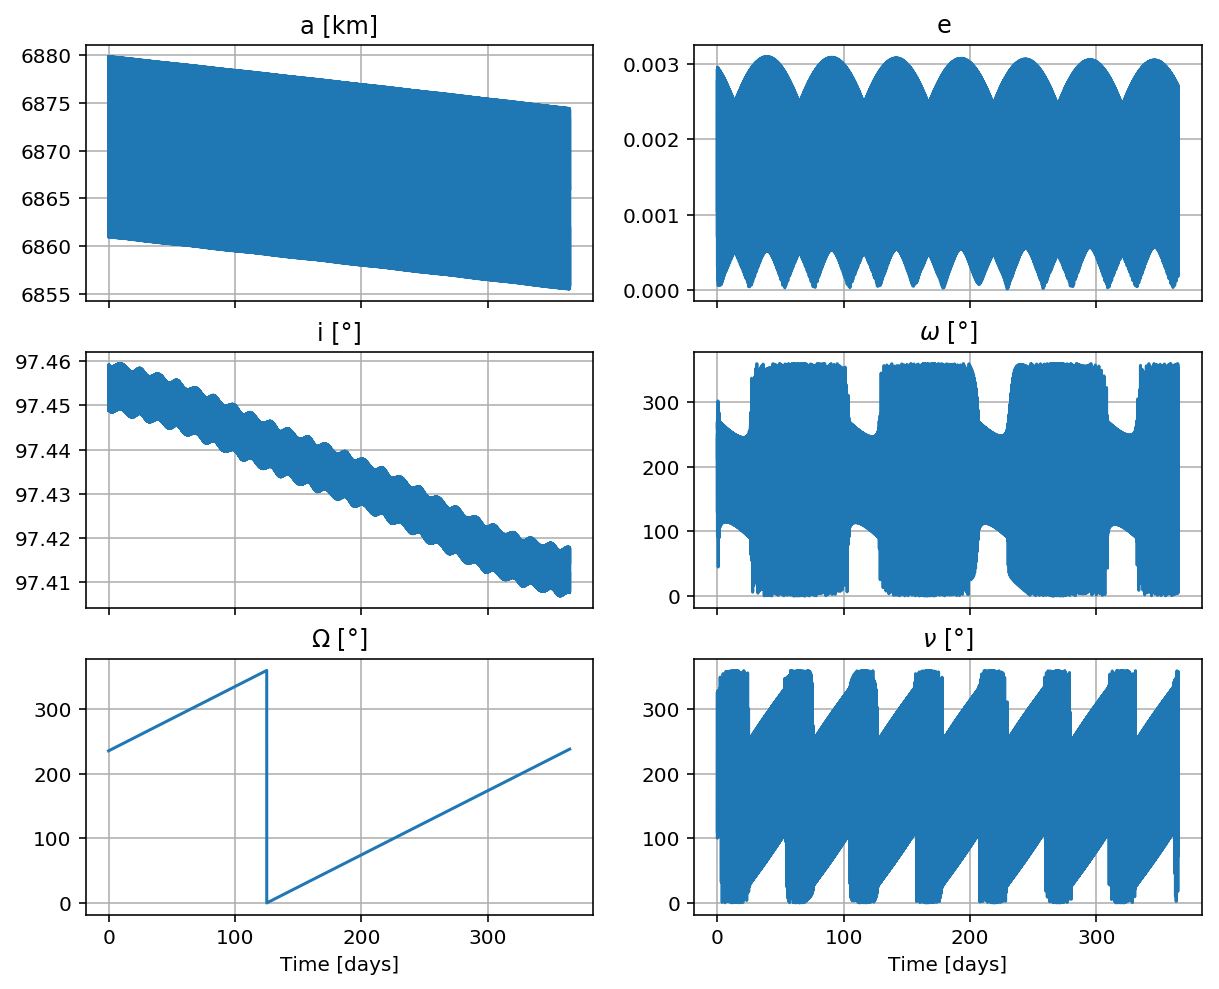

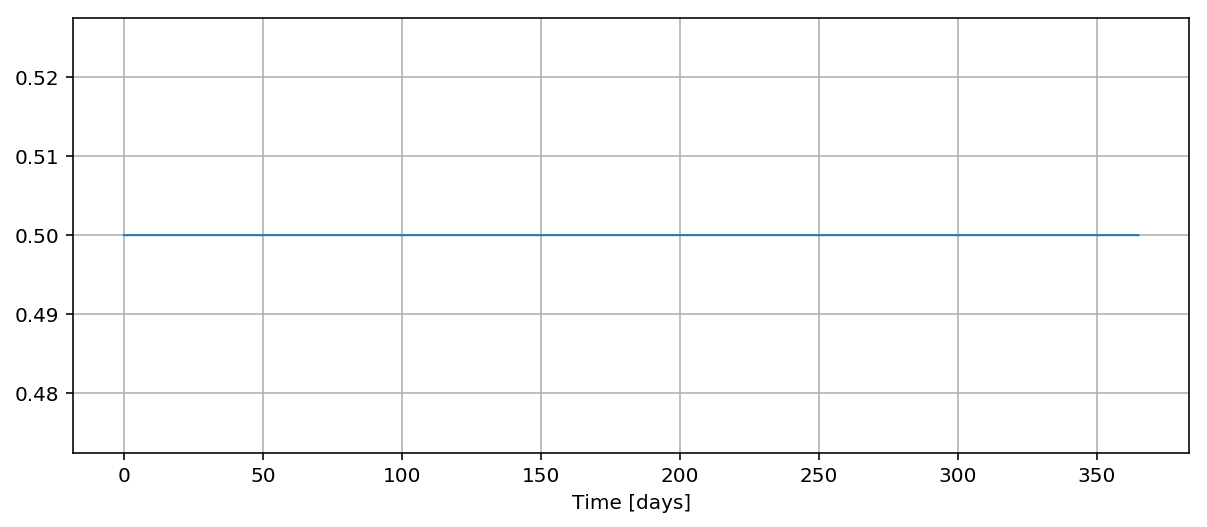

In [10]:
#maneuvers.makeReport()
print(coe)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
maneuvers.plot("coe")
maneuvers.plot("singleItem",maneuvers.history.propMass)
#display(maneuvers.ipvPlot3D());

In [4]:
# INITIAL CONDITIONS
coe2,date = auxiliary.parseTle("Historic_TLEs/SUCHAI_First.txt")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5
coe[2] = 0

# MANEUVERING
maneuvers2 = Maneuvers(coe,cubesat3Uc,date,verbose=True)
# A day of perturbations
print("30 days of Perturbations...")
maneuvers2.addPerturbation("J2")
maneuvers2.addPerturbation("atmosphere")
maneuvers2.addPerturbation("moon_gravity")
maneuvers2.addPerturbation("sun_gravity")
maneuvers2.addPerturbation("solar_pressure")
maneuvers2.propagate(60*60*24*365,60*10,max_step=60)

30 days of Perturbations...
Propagating...from day  0.0  to  365.0
Day: 365.000	Altitude: 498.443 km	Mass: 0.500
The solver successfully reached the end of the integration interval. (Status Code: 0)
100.0%



Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

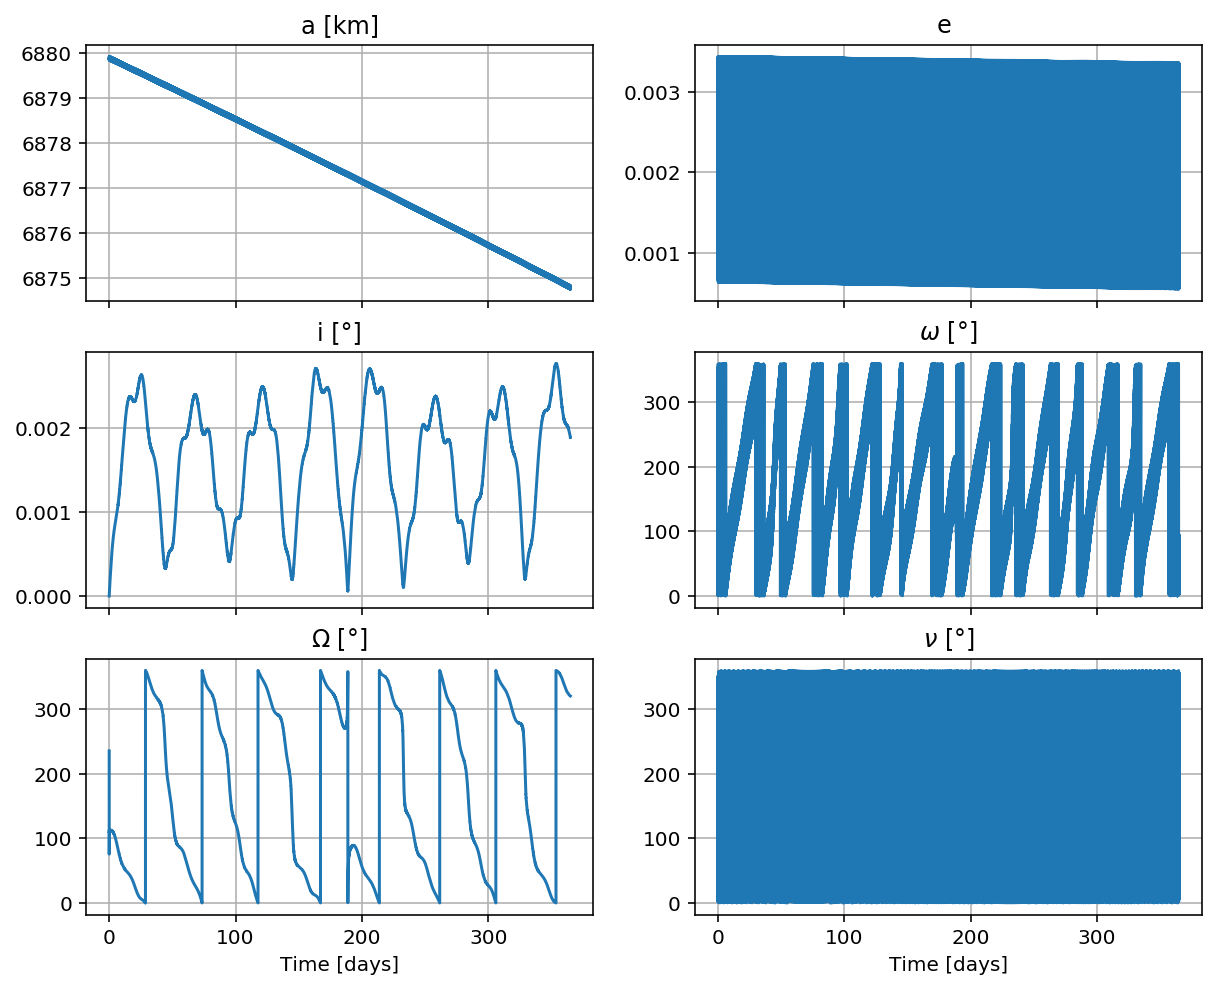

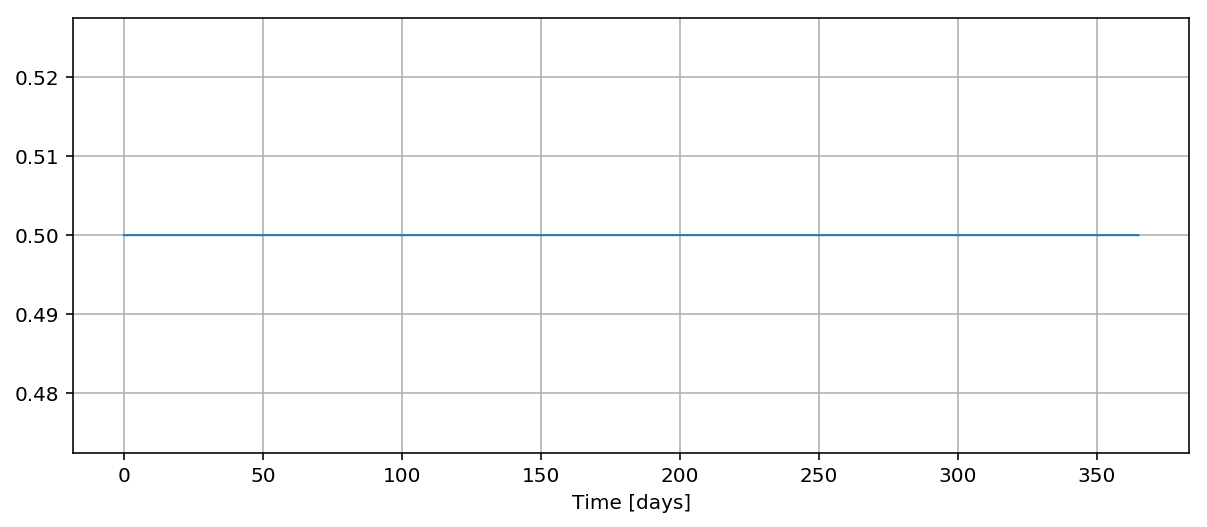

In [5]:
#maneuvers.makeReport()
%matplotlib inline
maneuvers2.plot("coe")
maneuvers2.plot("singleItem",maneuvers.history.propMass)
display(maneuvers2.ipvPlot3D());

# Part 2

In [15]:
# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("Historic_TLEs/SUCHAI_First.txt")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# MANEUVERING
maneuvers3 = Maneuvers(coe,cubesat3Uc,date,verbose=True)
maneuvers3.addPerturbation("thrust")
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    return np.sign(np.cos(omega+nu))*np.pi/2
maneuvers3.thrustProfile = (alphaCallback,betaCallback)
maneuvers3.propagate(60*60*24*365,60,max_step=10)

maneuvers4 = Maneuvers(coe,cubesat3Uc,date,verbose=True)
maneuvers4.addPerturbation("thrust")
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    return np.sign(np.sin(omega+nu))*np.pi/2
maneuvers4.thrustProfile = (alphaCallback,betaCallback)
maneuvers4.propagate(60*60*24*365,60,max_step=10)

maneuvers5 = Maneuvers(coe,cubesat3Uc,date,verbose=True)
maneuvers5.addPerturbation("thrust")
maneuvers5.propagate(60*60*24*365,60,max_step=10)


Propagating...from day  0.0  to  365.0
Day: 0.001	Altitude: 505.090 km	Mass: 0.050
A termination event occurred. (Status Code: 1)
100.0%

Propagating...from day  0.0  to  365.0
Day: 0.001	Altitude: 505.090 km	Mass: 0.050
A termination event occurred. (Status Code: 1)
100.0%

Propagating...from day  0.0  to  365.0
Day: 0.001	Altitude: 505.091 km	Mass: 0.050
A termination event occurred. (Status Code: 1)
100.0%



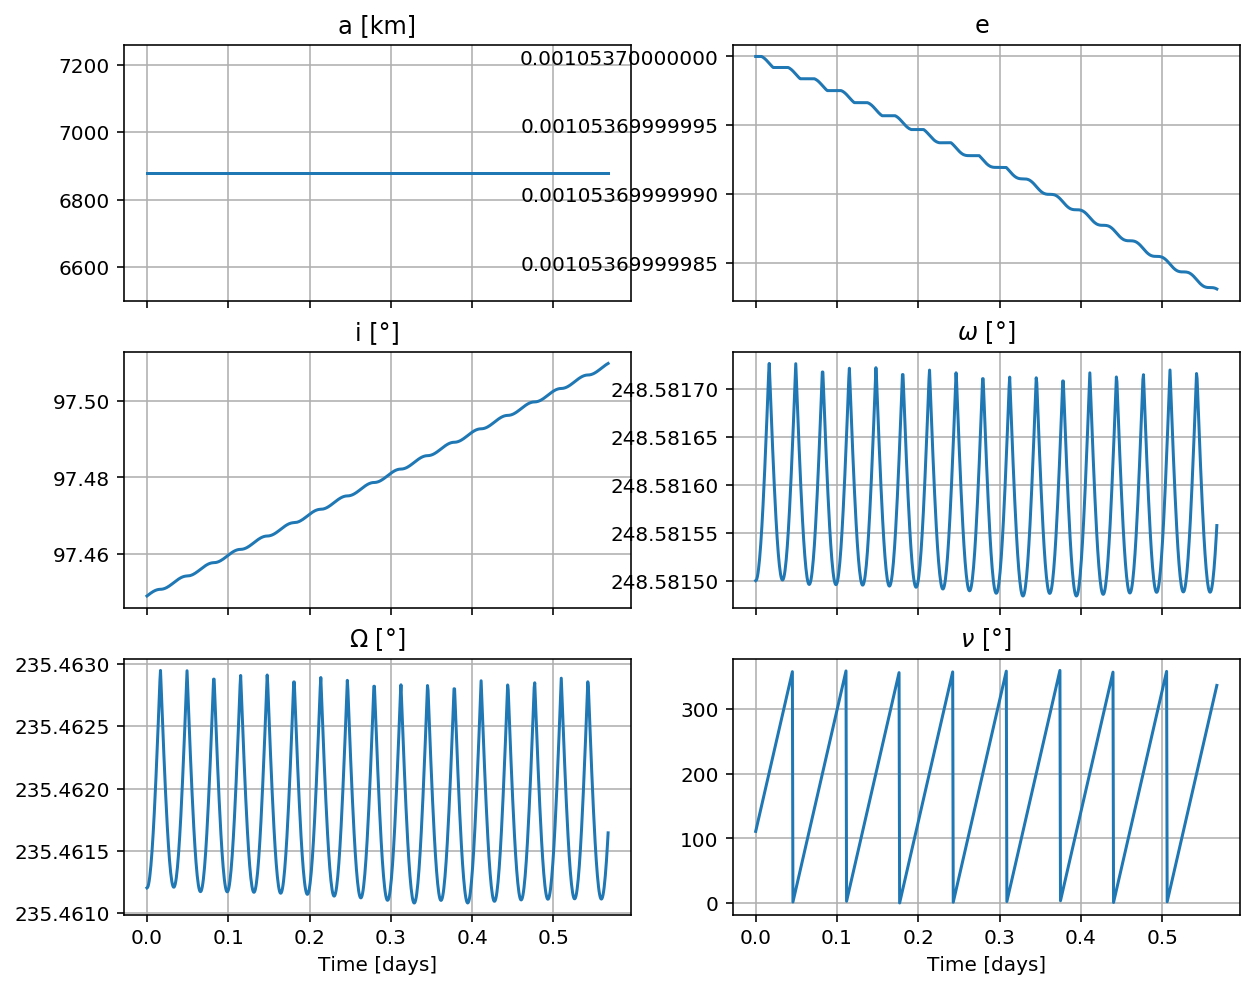

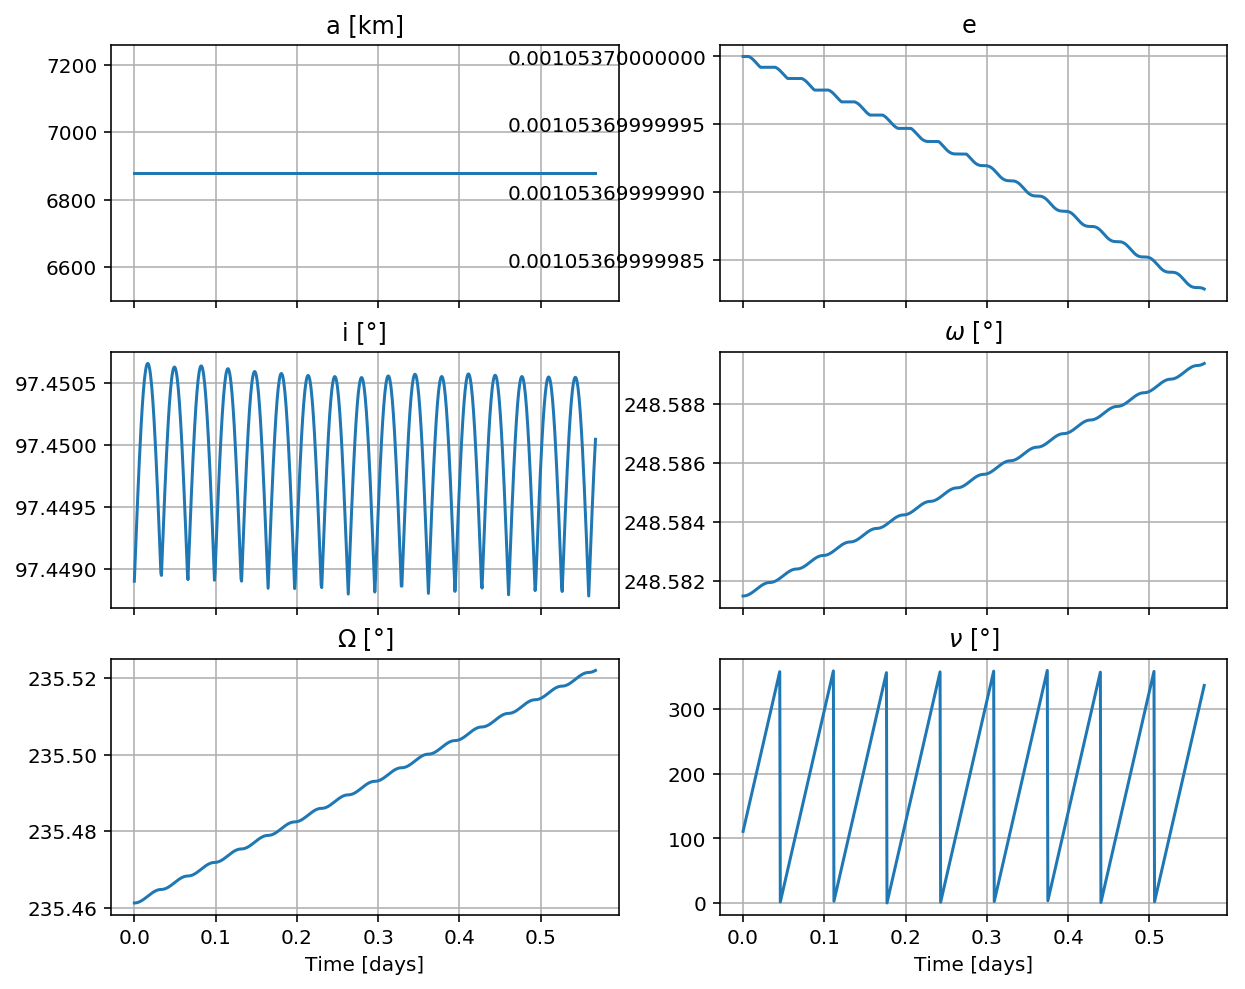

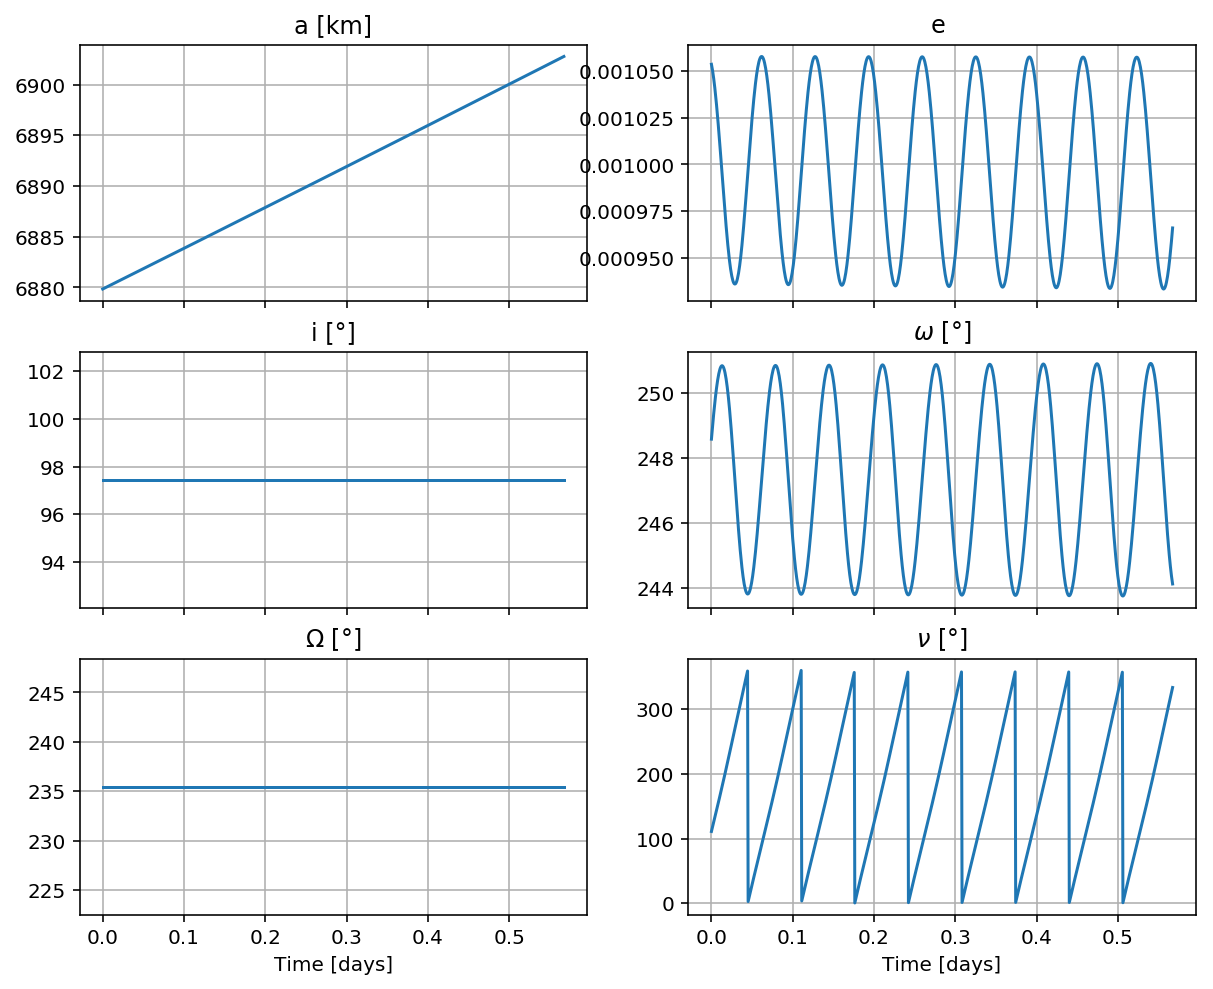

In [16]:
maneuvers3.plot("coe")
maneuvers4.plot("coe")
maneuvers5.plot("coe")

In [12]:
# INITIAL CONDITIONS
coe,date = auxiliary.parseTle("Historic_TLEs/SUCHAI_First.txt")
T = 2*np.pi*(coe[0]**3/constants.mu_E)**0.5

# SPACECRAFT DEFINITIONS
cubesat3Uc2 = models.Spacecraft(3.9,3.9-500e-3,10e-2*10e-2)
cubesat3Uc2.thruster = models.NanoPropCGP3()
cubesat3Uc2.solarPanels = models.DHV_CS_10(3)
cubesat3Uc2.battery = models.NanoPowerBP4("2P-2S")

# MANEUVERING
maneuvers6 = Maneuvers(coe,cubesat3Uc2,date,verbose=True)
maneuvers6.addPerturbation("thrust")
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    return np.sign(np.cos(omega+nu))*np.pi/2
maneuvers6.thrustProfile = (alphaCallback,betaCallback)
maneuvers6.propagate(60*60*24*365,60,max_step=10)

maneuvers7 = Maneuvers(coe,cubesat3Uc2,date,verbose=True)
maneuvers7.addPerturbation("thrust")
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    return np.sign(np.sin(omega+nu))*np.pi/2
maneuvers7.thrustProfile = (alphaCallback,betaCallback)
maneuvers7.propagate(60*60*24*365,60,max_step=10)

maneuvers8 = Maneuvers(coe,cubesat3Uc2,date,verbose=True)
maneuvers8.addPerturbation("thrust")
maneuvers8.propagate(60*60*24*365,60,max_step=10)

Propagating...from day  0.0  to  365.0
Day: 5.001	Altitude: 506.253 km	Mass: 0.059
A termination event occurred. (Status Code: 1)
100.0%

Propagating...from day  0.0  to  365.0
Day: 5.001	Altitude: 506.253 km	Mass: 0.059
A termination event occurred. (Status Code: 1)
100.0%

Propagating...from day  0.0  to  365.0
Day: 5.001	Altitude: 723.699 km	Mass: 0.059
A termination event occurred. (Status Code: 1)
100.0%



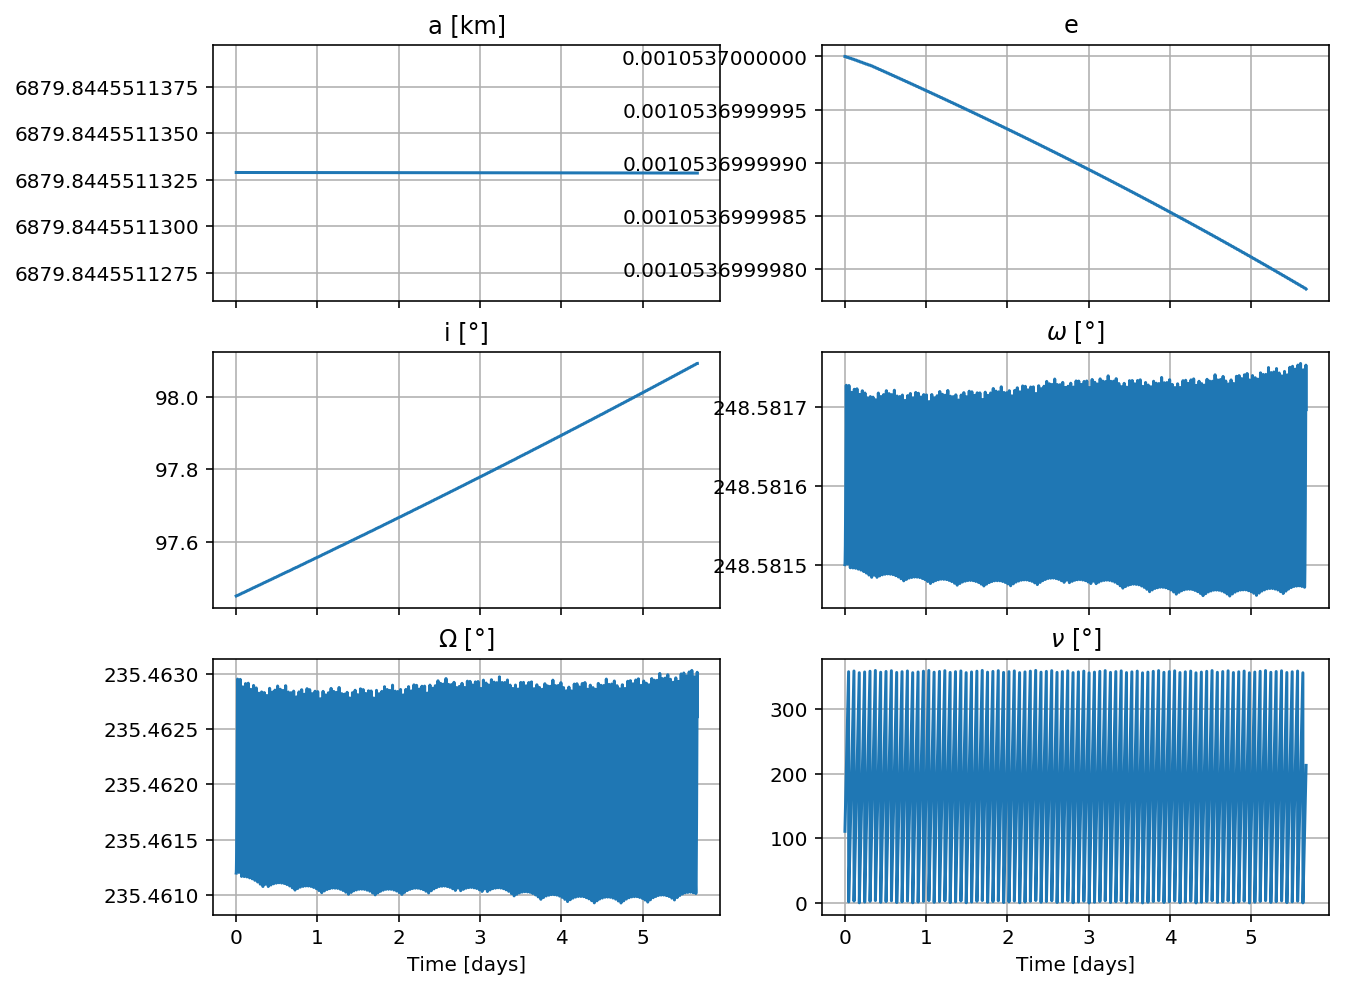

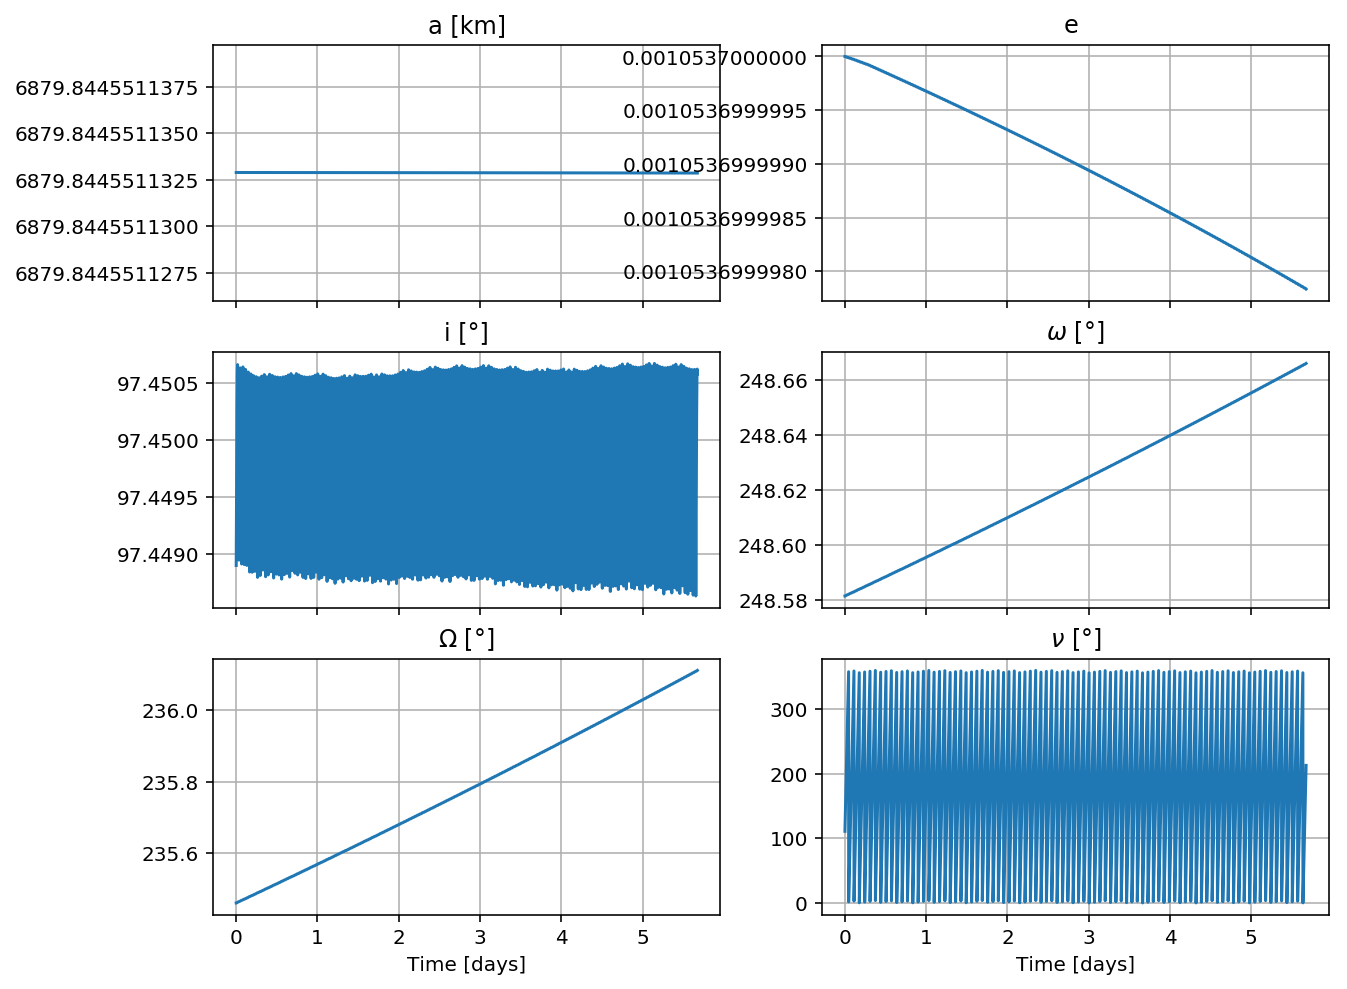

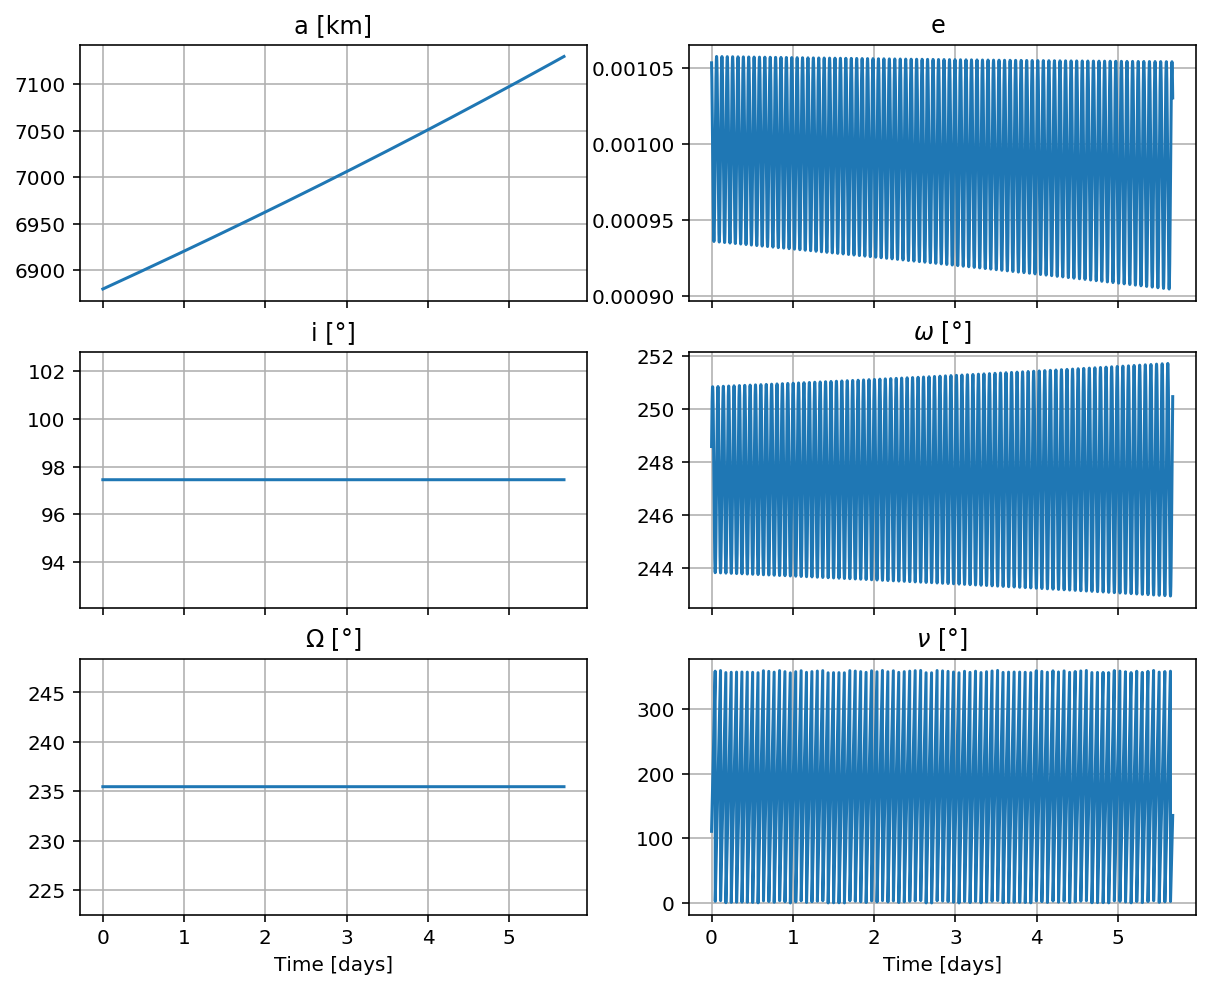

In [13]:
maneuvers6.plot("coe")
maneuvers7.plot("coe")
maneuvers8.plot("coe")